In [18]:
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import itertools

In [2]:
p=Path("dataset-resized")
dirs=p.glob("*")
image_data=[]
labels=[]

image_path=[]  #Optional

label_dict={"cardboard":0,
           "glass":1,
           "metal":2,
           "paper":3,
           "plastic":4,
           "trash":5}
label2gar={0:"cardboard",
               1:"glass",
               2:"metal",
               3:"paper",
               4:"plastic",
               5:"trash"}


for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]
    
    #print(label)
    cnt=0
    #print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        img=image.load_img(img_path,target_size=(40,40))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
        
    print(cnt)

403
501
410
594
482
137


In [4]:
X=np.array(image_data)
X=X/255.0
Y=np.array(labels)
print(X.shape,Y.shape)

(2527, 40, 40, 3) (2527,)


In [5]:
def drw_img(X,label):
    plt.title(label2gar[label])
    plt.axis("off")
    plt.imshow(X)

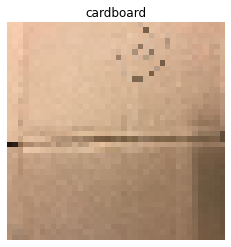

In [6]:
drw_img(X[0],Y[0])

In [7]:
print(Y)
from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)
print(Y)

[0 0 0 ... 5 5 5]
[3 2 2 ... 5 4 3]


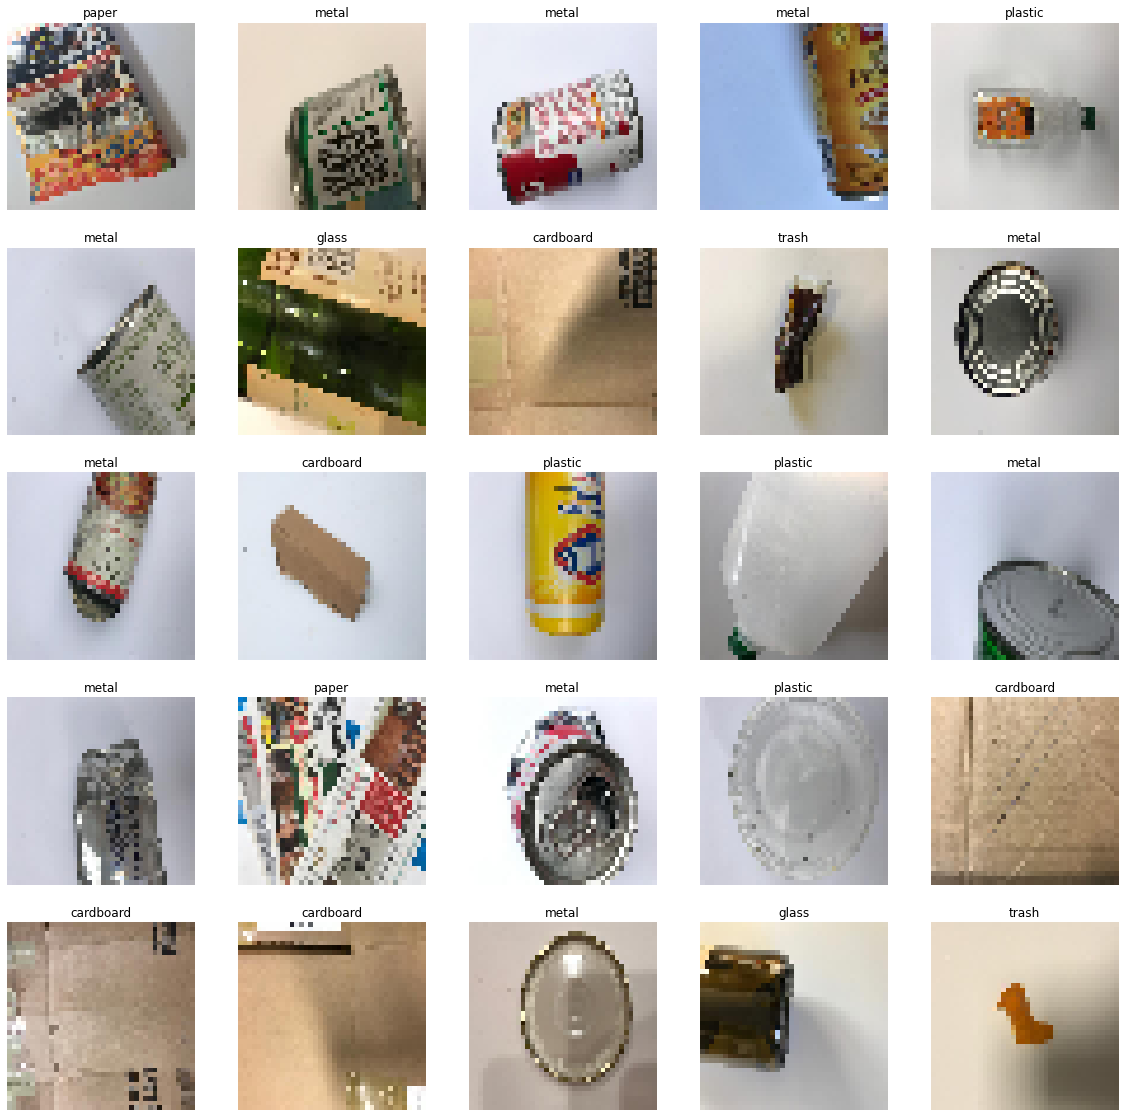

In [8]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    drw_img(X[i],Y[i])

In [9]:
X_=np.array(X)
Y_=np.array(Y)

Y_=np_utils.to_categorical(Y_)
print(X_.shape,Y_.shape)

split=int((0.8)*X_.shape[0])
print(split)

X_train=X_[:split,:]
Y_train=Y_[:split,:]

X_test=X_[split:,:]
Y_test=Y_[split:,:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2527, 40, 40, 3) (2527, 6)
2021
(2021, 40, 40, 3) (2021, 6)
(506, 40, 40, 3) (506, 6)


In [10]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(40,40,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         7

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [12]:
hist=model.fit(
        X_train,
        Y_train,
        epochs=80,
        shuffle=True,
        batch_size=32,
        validation_split=0.20,
)

Epoch 1/80
51/51 [==============================] - 5s 108ms/step - loss: 1.7725 - accuracy: 0.1968 - val_loss: 1.7541 - val_accuracy: 0.2667
Epoch 2/80
51/51 [==============================] - 5s 104ms/step - loss: 1.7587 - accuracy: 0.2092 - val_loss: 1.7493 - val_accuracy: 0.2988
Epoch 3/80
51/51 [==============================] - 6s 109ms/step - loss: 1.7444 - accuracy: 0.2030 - val_loss: 1.7214 - val_accuracy: 0.3111
Epoch 4/80
51/51 [==============================] - 5s 108ms/step - loss: 1.7247 - accuracy: 0.2240 - val_loss: 1.6879 - val_accuracy: 0.2667
Epoch 5/80
51/51 [==============================] - 6s 109ms/step - loss: 1.6913 - accuracy: 0.2395 - val_loss: 1.6319 - val_accuracy: 0.3160
Epoch 6/80
51/51 [==============================] - 6s 114ms/step - loss: 1.6626 - accuracy: 0.2729 - val_loss: 1.5869 - val_accuracy: 0.3210
Epoch 7/80
51/51 [==============================] - 6s 125ms/step - loss: 1.6304 - accuracy: 0.2834 - val_loss: 1.5882 - val_accuracy: 0.3235
Epoch 

51/51 [==============================] - 7s 129ms/step - loss: 0.5363 - accuracy: 0.8075 - val_loss: 2.0845 - val_accuracy: 0.5753
Epoch 59/80
51/51 [==============================] - 6s 126ms/step - loss: 0.5244 - accuracy: 0.8088 - val_loss: 2.0526 - val_accuracy: 0.5728
Epoch 60/80
51/51 [==============================] - 7s 130ms/step - loss: 0.5417 - accuracy: 0.7915 - val_loss: 1.9731 - val_accuracy: 0.6000
Epoch 61/80
51/51 [==============================] - 7s 131ms/step - loss: 0.5660 - accuracy: 0.7921 - val_loss: 1.9485 - val_accuracy: 0.5728
Epoch 62/80
51/51 [==============================] - 7s 130ms/step - loss: 0.5788 - accuracy: 0.7859 - val_loss: 2.0630 - val_accuracy: 0.5827
Epoch 63/80
51/51 [==============================] - 6s 125ms/step - loss: 0.5277 - accuracy: 0.7964 - val_loss: 2.0212 - val_accuracy: 0.5975
Epoch 64/80
51/51 [==============================] - 6s 121ms/step - loss: 0.5567 - accuracy: 0.7834 - val_loss: 2.1270 - val_accuracy: 0.5802
Epoch 65/80

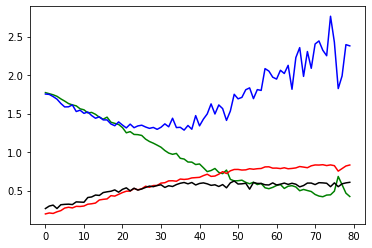

In [13]:
plt.figure(0)
plt.plot(hist.history['loss'],'green')
plt.plot(hist.history['val_loss'],'blue')
plt.plot(hist.history['accuracy'],'red')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [15]:
Y_pred=model.predict(X_test)
Y_pred=np.argmax(Y_pred,axis=1)  #get max from each row
print(Y_pred)
actual_Y_label=np.argmax(Y_test,axis=1)

class_name=["cardboard","glass","metal","paper","plastic","trash"]
cls_report=classification_report(actual_Y_label,Y_pred,target_names=class_name)
print(cls_report)

[2 3 2 4 3 1 0 3 3 1 2 2 0 2 1 4 4 2 2 2 1 0 1 4 3 4 0 1 1 3 3 1 3 4 2 4 2
 0 0 0 1 3 0 3 3 4 4 0 2 1 0 2 3 3 2 3 1 0 0 2 1 0 2 0 2 1 2 3 4 3 0 3 0 2
 1 3 1 1 3 4 3 0 1 0 0 4 5 2 4 2 3 1 3 3 1 2 4 1 3 1 4 4 4 1 1 2 5 3 3 4 1
 0 4 0 4 2 4 1 0 1 3 2 1 0 0 4 3 1 3 2 3 2 5 3 3 3 4 0 2 1 2 1 4 4 3 3 0 1
 0 4 2 1 0 4 4 1 1 4 1 1 3 5 0 2 2 2 3 4 3 4 1 1 5 0 0 5 4 4 2 4 4 3 3 2 2
 3 1 3 0 4 0 2 2 2 4 4 4 3 0 4 5 0 0 0 2 3 3 5 2 1 2 0 4 2 1 1 3 4 4 3 2 2
 4 2 3 1 4 2 3 1 3 1 3 1 3 1 4 2 3 2 3 1 0 3 0 1 3 1 4 2 2 2 3 2 4 4 4 0 0
 4 1 0 3 2 3 0 0 2 1 3 1 0 3 1 3 1 2 4 2 2 3 1 2 4 1 1 1 4 2 4 0 2 4 1 4 4
 3 3 4 1 3 4 3 4 3 5 1 1 3 1 4 3 2 4 1 2 4 2 4 2 3 1 2 2 2 0 1 3 4 1 1 4 0
 1 0 0 1 1 1 3 1 1 4 1 4 4 3 1 5 3 4 4 0 4 4 1 4 2 4 3 2 1 2 4 0 4 2 2 5 0
 1 4 4 1 4 5 2 1 4 0 5 2 1 4 5 3 0 4 3 5 3 1 0 3 0 4 4 4 4 1 1 2 0 4 1 2 4
 1 1 2 4 3 2 3 0 3 2 4 4 3 2 1 1 1 3 2 4 4 1 2 1 1 1 1 3 1 1 1 1 1 3 0 3 3
 2 2 3 2 4 3 0 0 4 4 4 4 4 3 4 3 1 3 0 4 2 0 3 3 4 1 4 3 0 2 0 1 4 3 0 4 3
 2 0 1 3 3 2 4 0 1 4 1 1 

In [16]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[[60  5  5  4  6  1]
 [ 2 70 14  5 15  2]
 [ 1  8 51  6  9  2]
 [ 5  8 14 78 15  2]
 [ 1 17  6  6 62  2]
 [ 4  4  2  4  4  6]]


<Figure size 432x288 with 0 Axes>

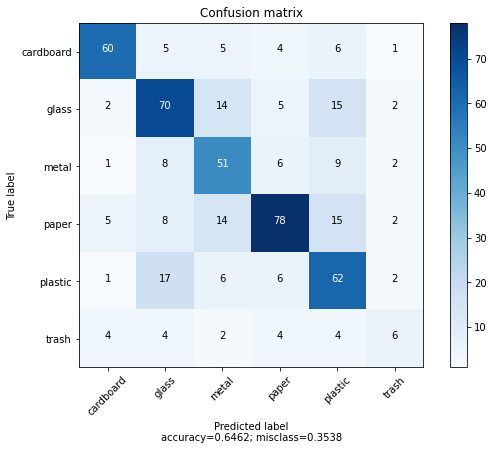

In [19]:
cnf_matrix=confusion_matrix(actual_Y_label,Y_pred,labels=[0,1,2,3,4,5])
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix,target_names=class_name,normalize=False)

Predict metal but actual  is plastic
Predict metal but actual  is cardboard
Predict paper but actual  is metal
Predict metal but actual  is cardboard
Predict cardboard but actual  is paper
Predict metal but actual  is glass
Predict metal but actual  is glass
Predict metal but actual  is paper
Predict metal but actual  is paper
Predict glass but actual  is cardboard
Predict plastic but actual  is glass
Predict plastic but actual  is glass
Predict glass but actual  is metal
Predict paper but actual  is cardboard
Predict glass but actual  is paper
Predict plastic but actual  is paper
Predict cardboard but actual  is trash
Predict glass but actual  is cardboard
Predict paper but actual  is glass
Predict plastic but actual  is metal
Predict metal but actual  is glass
Predict paper but actual  is metal
Predict metal but actual  is cardboard
Predict cardboard but actual  is paper
Predict metal but actual  is glass
Predict metal but actual  is paper
Predict paper but actual  is plastic
Predict

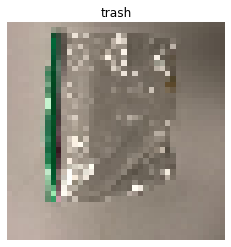

In [20]:
for i in range(Y_test.shape[0]):
    if Y_pred[i]!=actual_Y_label[i]:
        print("Predict %s but actual  is %s"%(label2gar[Y_pred[i]],label2gar[actual_Y_label[i]]))
        drw_img(X_test[i].reshape(40,40,3),actual_Y_label[i])

In [21]:
def predict_image(image_path):
    img=image.load_img(image_path,target_size=(40,40))
    img_array=image.img_to_array(img)
    img_array=np.array(img_array)
    img_array=img_array.reshape(40,40,3)
    prob=model.predict(img_array.reshape(-1,40,40,3))
    prob=np.array(prob)
    print(label2gar[np.argmax(prob)])

In [22]:
model_json = model.to_json()
with open("modelg.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("modelg.h5")